In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

subject = pd.read_csv('subject_registry.csv')
timezones = pd.read_csv('subject_timezone_log.csv')

#Merge with Timezone Log
subject.query('ISA == "BP03" and Actual_Visit not in ["ED", "SF"]', inplace=True)
merged_df = subject.merge(timezones, left_on=["Site", "SubjectID"], right_on=["Site", "subject"], how="inner")

# Convert timestamp to datetime format
merged_df["timestamp_iso"] = pd.to_datetime(merged_df["timestamp_iso"])

# Sort data by timestamp
merged_df = merged_df.sort_values(by="timestamp_iso")
merged_df

,Site,SubjectID,ISA,Actual_Visit,Data_collection_started,subject,timestamp_iso,time_offset,timezone_location
103,122,11720,BP03,Complete,18-May-21,11720,2021-05-19 00:20:20+00:00,-25200,America/Los_Angeles
99,122,11681,BP03,Complete,19-May-21,11681,2021-05-19 19:01:31+00:00,-25200,America/Los_Angeles
102,122,11696,BP03,Complete,19-May-21,11696,2021-05-19 21:39:42+00:00,-25200,America/Los_Angeles
104,122,11545,BP03,Complete,25-May-21,11545,2021-05-26 19:51:51+00:00,-25200,America/Los_Angeles
105,122,11545,BP03,Complete,25-May-21,11545,2021-05-30 15:42:39+00:00,-18000,America/Chicago
...,...,...,...,...,...,...,...,...,...
90,114,12604,BP03,V6,7-Oct-21,12604,2021-12-01 16:15:16+00:00,-28800,America/Los_Angeles
181,138,12772,BP03,V3,1-Dec-21,12772,2021-12-01 16:24:59+00:00,-18000,America/New_York
4,102,12902,BP03,V3,3-Dec-21,12902,2021-12-03 15:04:34+00:00,-18000,America/New_York
191,142,12885,BP03,V3,3-Dec-21,12885,2021-12-03 20:52:23+00:00,-18000,America/New_York


In [2]:
# Create a pivot table for heatmap visualization
heatmap_data = merged_df.pivot(index="SubjectID", columns="timestamp_iso", values="time_offset")
heatmap_data = heatmap_data.ffill(axis=1)  # Fill missing values forward in time
heatmap_data = heatmap_data.apply(lambda x: x/3600)

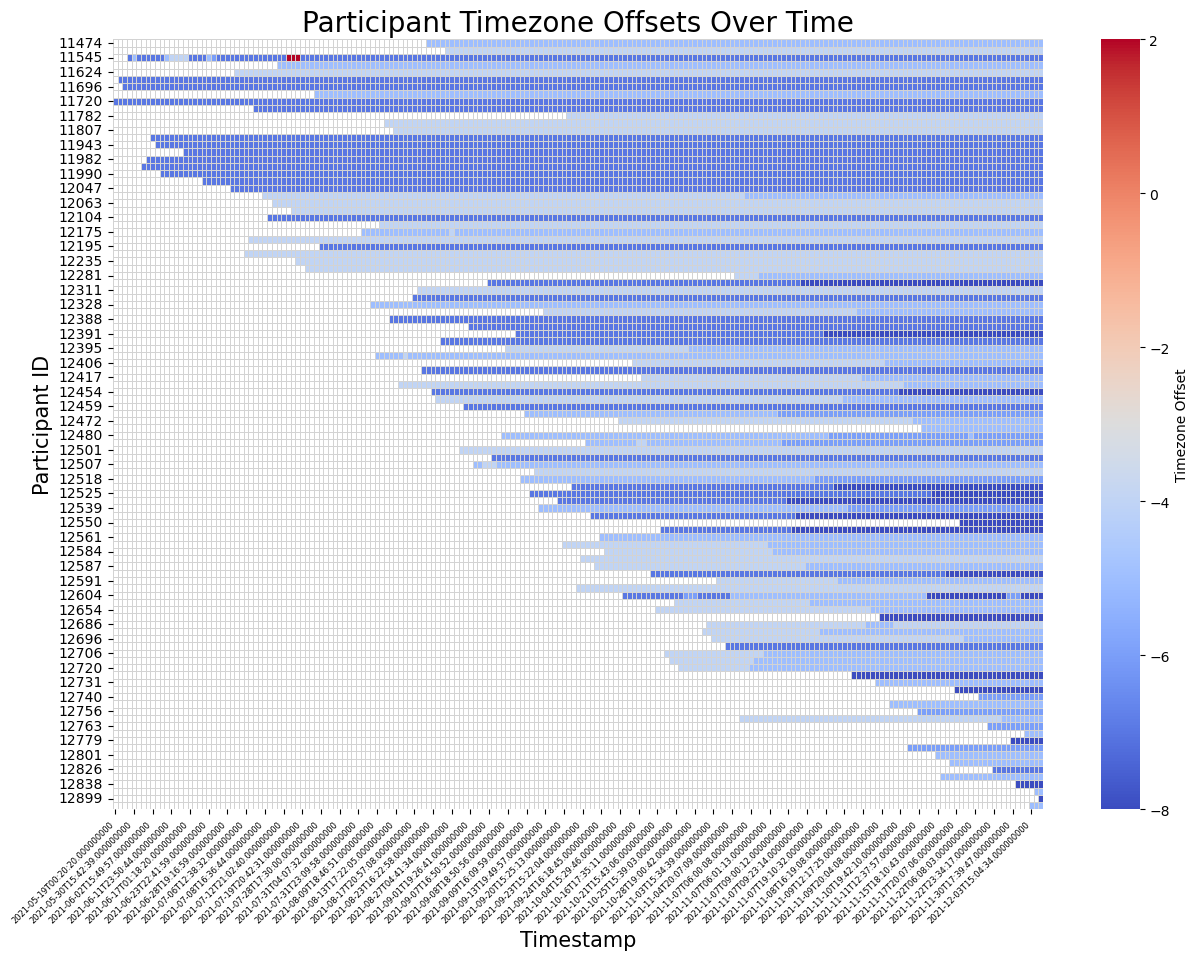

In [3]:
# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={'label': 'Timezone Offset'}, linewidth=0.6, linecolor='lightgray')
plt.title("Participant Timezone Offsets Over Time", fontsize=20)
plt.xlabel("Timestamp", fontsize=15)
plt.ylabel("Participant ID", fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=6)
plt.show()